# Mini Project 2

# Introduction

# Features Information:

# Importing required libraries

In [1]:
import numpy as np  #linear algebra
import pandas as pd # a data processing and CSV I/O library

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

# Reading the dataset

In [2]:
dry =pd.read_csv("data.csv")
dry.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Preprocessing

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Class"]

for col in columns:
    dry[col] = le.fit_transform(dry[col])
    print(le.classes_)
      
dry.head()

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


# Exploratory Data Analysis (EDA)

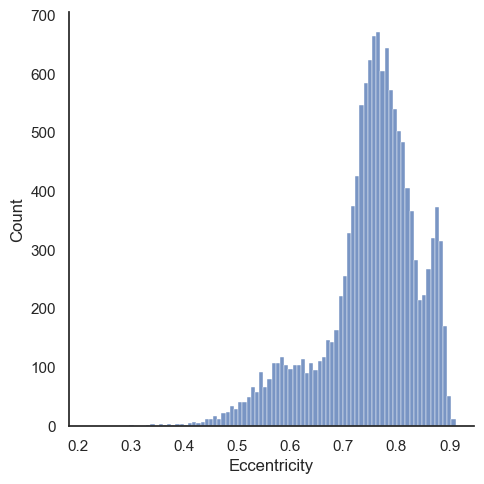

In [4]:
sns.displot(dry['Eccentricity'])

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64


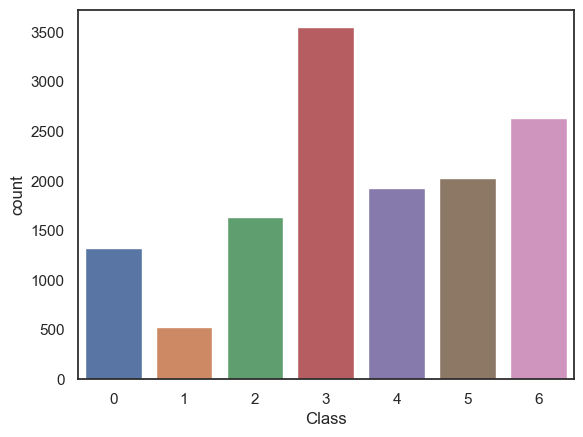

In [5]:
print(dry['Class'].value_counts())
_ = sns.countplot(x='Class', data=dry)

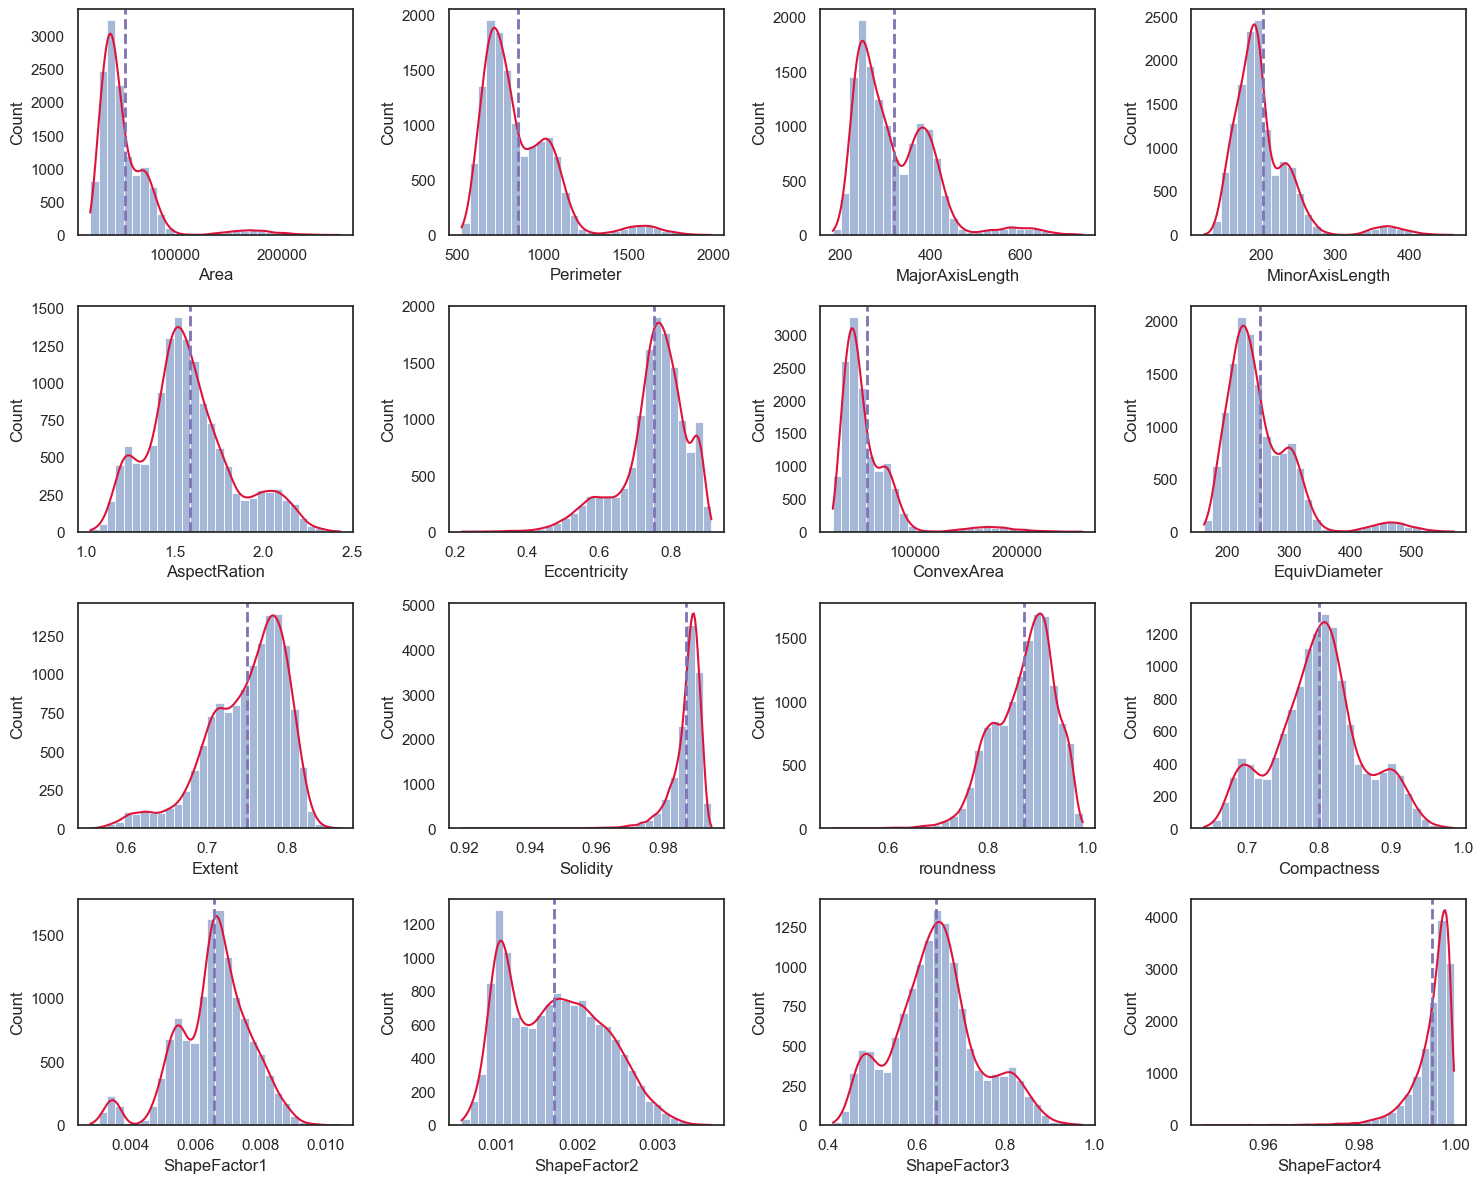

In [6]:
Numeric_cols = dry.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(dry[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=dry[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

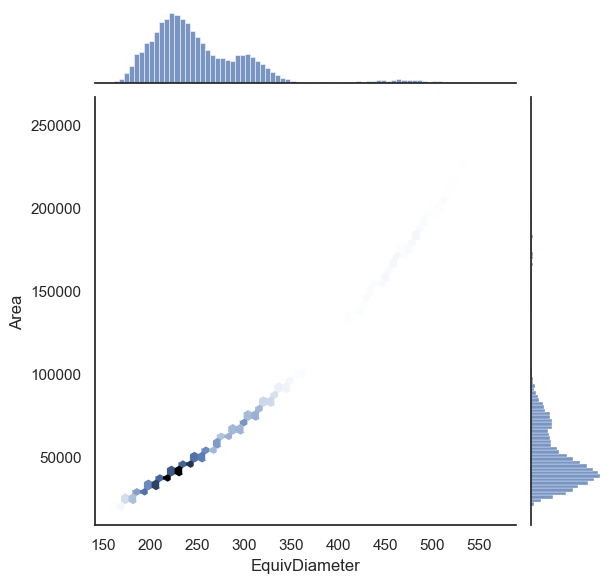

In [7]:
sns.jointplot(x='EquivDiameter', y='Area', data=dry, kind="hex")

<AxesSubplot:xlabel='Perimeter', ylabel='Density'>

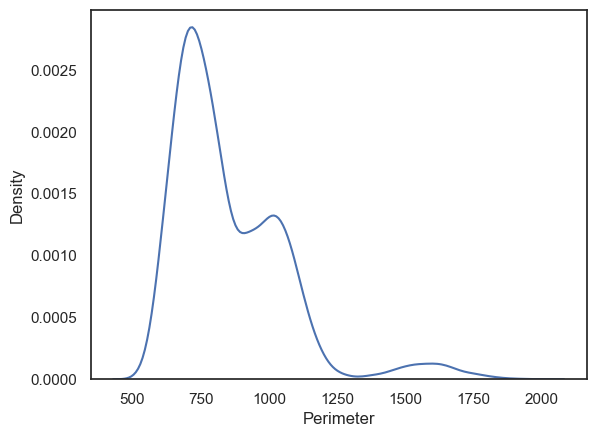

In [8]:
sns.kdeplot(dry['Perimeter'])

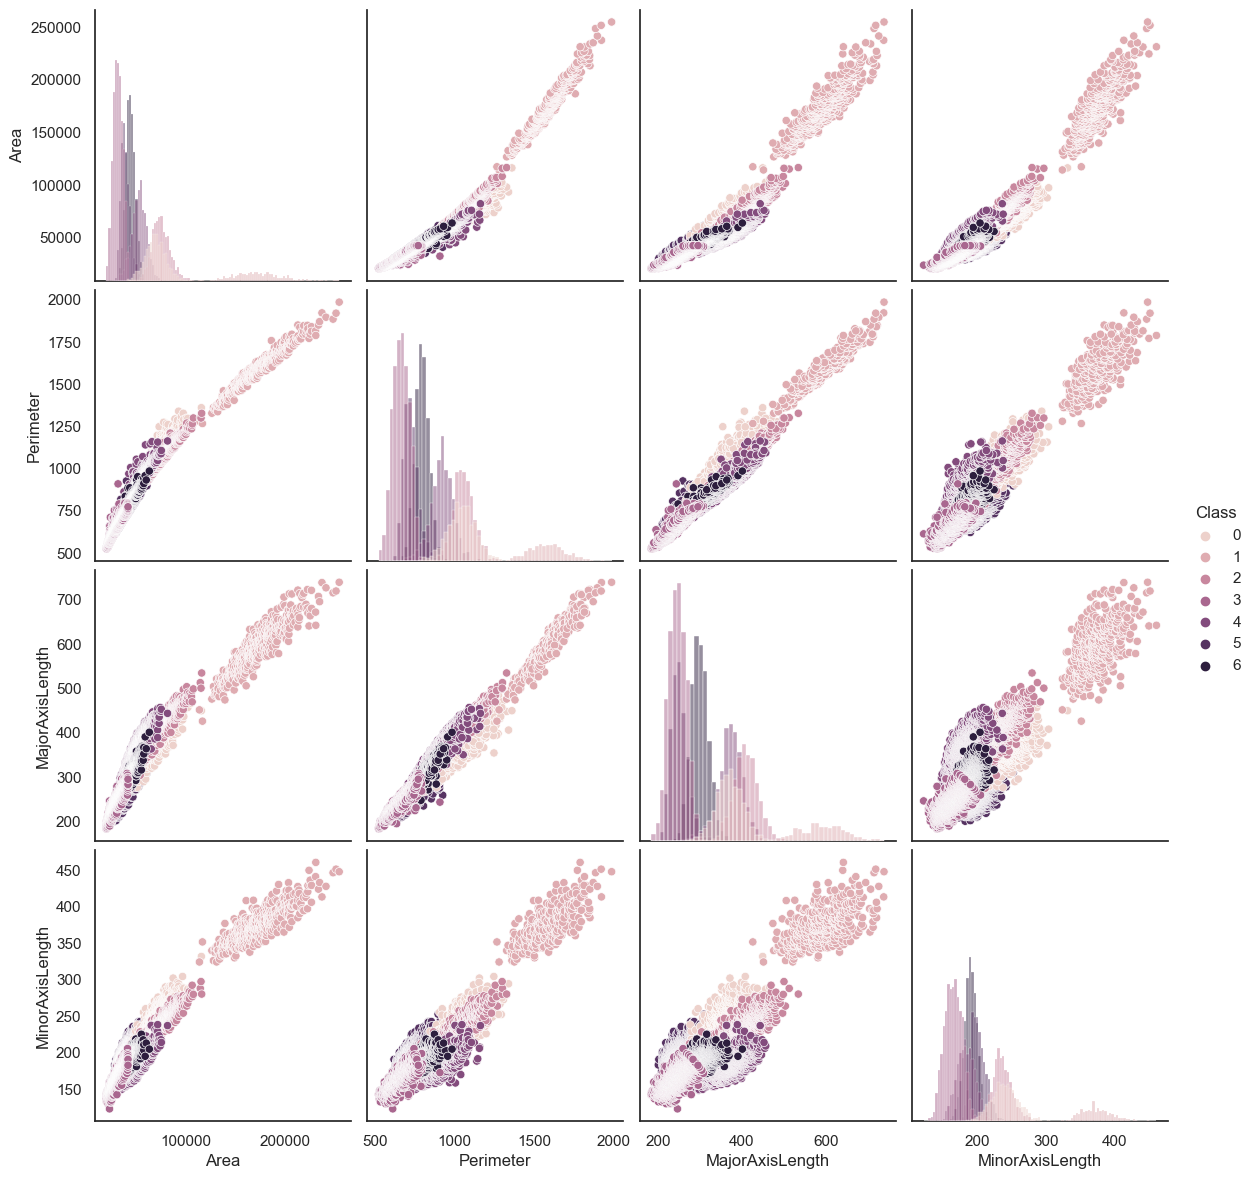

In [11]:
sns.pairplot(dry.drop(['AspectRation','Eccentricity','ConvexArea',	
    'EquivDiameter',	
    'Extent',	
    'Solidity',	
    'roundness',	
    'Compactness',	
    'ShapeFactor1',	
    'ShapeFactor2',	
    'ShapeFactor3',	
    'ShapeFactor4'], axis=1), hue='Class', height=3, diag_kind='hist')

<AxesSubplot:>

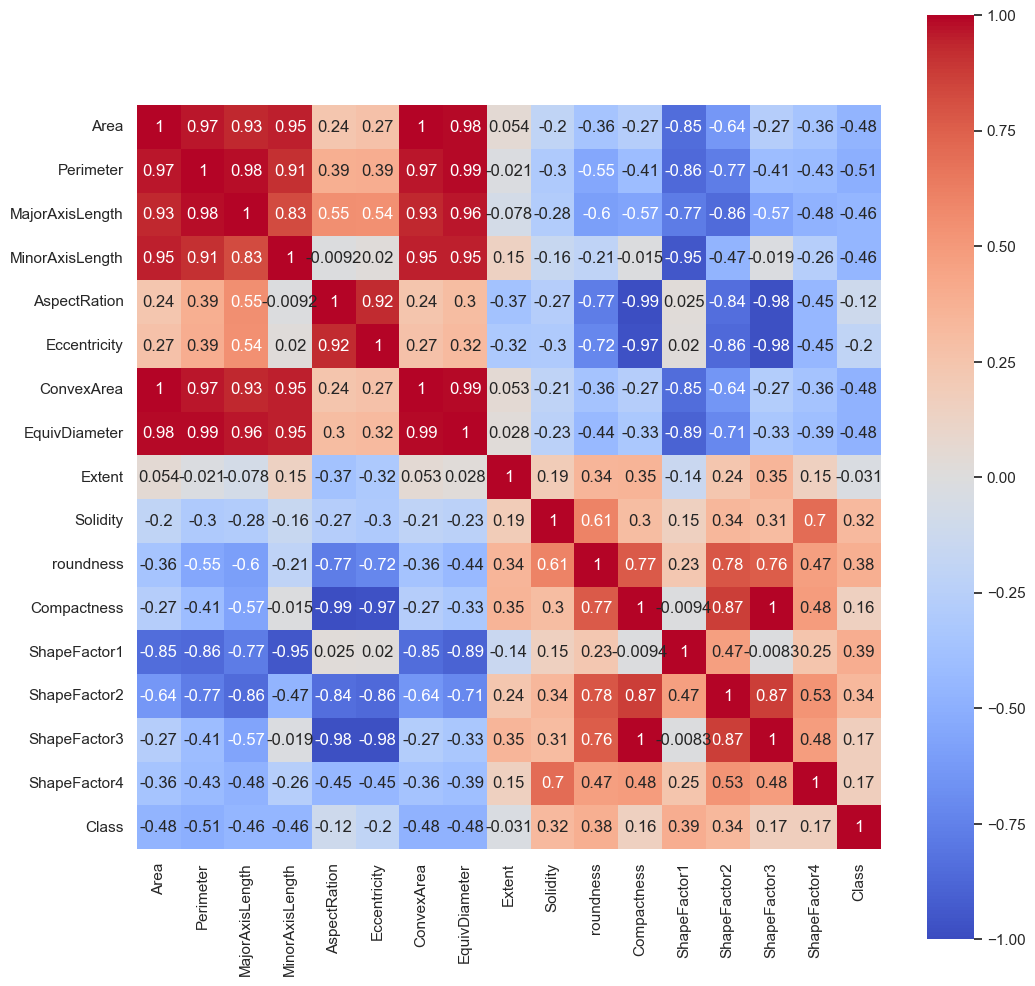

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(dry.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

# Defining X and y

In [14]:
X = dry[[
    'Area',
    'Perimeter',
    'MajorAxisLength',	
    'MinorAxisLength',	
    'AspectRation',	
    'Eccentricity',
    'ConvexArea',	
    'EquivDiameter',	
    'Extent',	
    'Solidity',	
    'roundness',	
    'Compactness',	
    'ShapeFactor1',	
    'ShapeFactor2',	
    'ShapeFactor3',	
    'ShapeFactor4']].values
y = dry[['Class']]

# Training Models


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [16]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9120
- F1 score: 0.912039
- Precision: 0.912262
- Recall: 0.912013
----------------------------------
Model performance for Test set
- Accuracy: 0.9225
- Fl score: 0.9225
- Precision: 0.9226
- Recall: 0.9225


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.8957
- Fl score: 0.8957
- Precision: 0.8959
- Recall: 0.8957


Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.999908
- Precision: 0.999908
- Recall: 0.999908
----------------------------------
Model performance for Test set
- Accuracy: 0.9321
- Fl score: 0.9319
- Precision: 0.9321
- Recall: 0.9321


Support Vector Machine
Model performance for Training set
- Accuracy: 0.6327
- F1 score: 0.598635
- Precision: 0.608044
- Recall: 0.632715
----------------------------------


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.8583
- F1 score: 0.858018
- Precision: 0.860376
- Recall: 0.858284
----------------------------------
Model performance for Test set
- Accuracy: 0.7304
- Fl score: 0.7299
- Precision: 0.7356
- Recall: 0.7304




C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
